In [1]:

import itertools
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

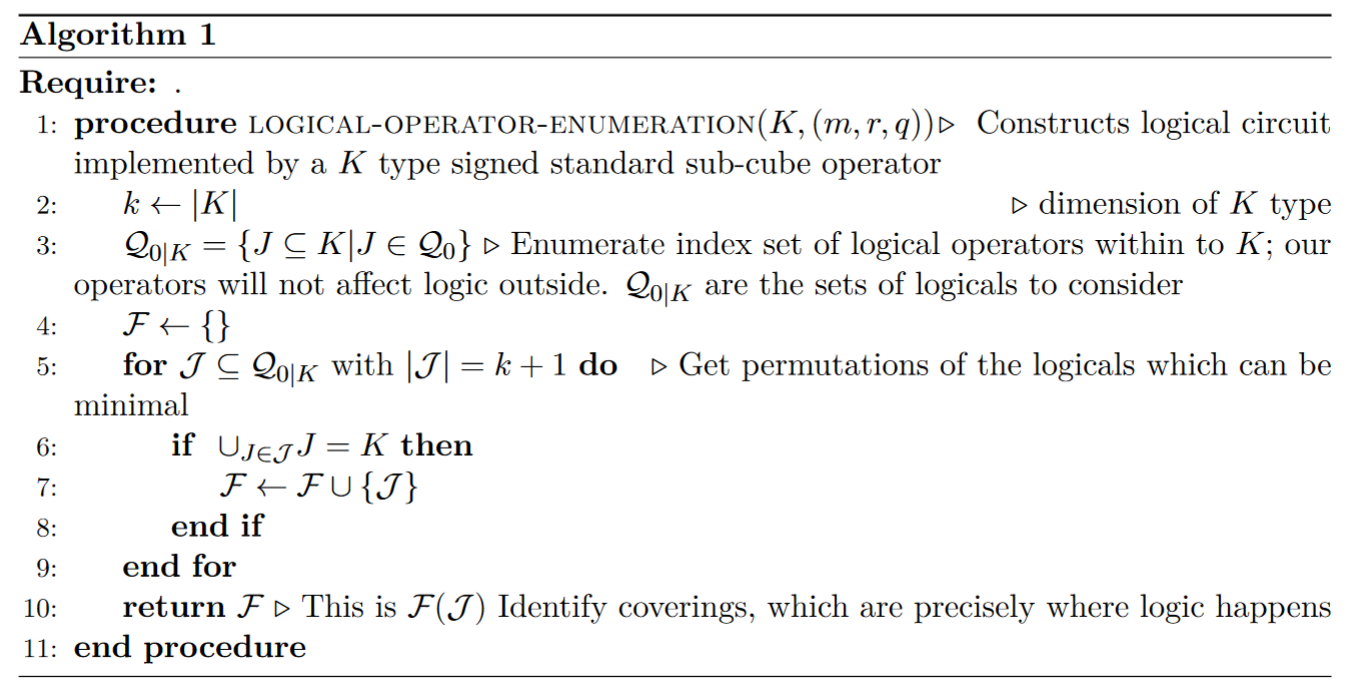

In [2]:
def enumerate_logical_qubits(K: set, q: int, r: int):
    """Given a hypercube with basis $K$, enumerate all possible logical qubits

    Args:
        K (set): Hypercube basis; may be a restriction within a larger hypercube
        q (int): Codimension of the X stabilizers
        r (int): r+1 is the dimension of the Z stabilizers
    """
    assert r >= q, "Does not form a valid CSS code"
    
    # Generate index set of logical operators restricted to K
    logical_operators = set()
    for Ksize in range(q + 1, r + 1):
        logs = itertools.combinations(K, Ksize)
        logical_operators.update(logs)
    
    return logical_operators


def logical_circuit_enumeration(k: int, K: set, q: int, r: int):
    """Describes the logical circuit affected by a $k$th level physical operator applied to a hypercube of basis $K$ on a QRM with parameters $q$, $r$

    Args:
        k (int): Clifford level of physical operator applied; 2 for T gates
        K (set): Set of bases, e.g. {1, 2, 3}
        q (int): q parameter 
        r (int): r parameter

    Returns:
        set: Set of C^n Z circuits that are applied
    """
    assert r >= q, "Does not form a valid CSS code"
    assert len(K) >= q + k * r + 1, "Will not be a logical operator"
    
    K = set(list(K))
    
    if len(K) > (k + 1) * r:
        # logical identity
        return set()
    
    logical_operators = enumerate_logical_qubits(K, q, r)
    
    # Check which of these combinations of combinations are valid
    circuit = set()
    all_combinations = list(itertools.combinations(logical_operators, k + 1))
    
    for combo in all_combinations:
        # get union of all sets and check if its a covering
        all_idxs = set().union(*combo)
        if all_idxs == K:
            circuit.add(combo)
    
    return circuit

In [3]:
enumerate_logical_qubits({1, 2, 3, 4}, 1, 2 )

{(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)}

In [4]:
def set_to_bin(idxs: set, m=None):
    if m is None:
        m = max(idxs)
    one_hot = [0] * m
    for idx in idxs:
        one_hot[idx - 1] = 1
    
    one_hot = one_hot[::-1]
    return tuple(one_hot)
    
def set_to_int(idxs: set):
    # first, produce a one hot encoding of the set
    # assume all idxs are 1-indexed
    bin_string = ''.join(map(str, set_to_bin(idxs)))
    
    return int(bin_string, 2)

def log_to_physical(idxs: set, m=None):
    if m is None:
        m = max(idxs)
    # given a set of physical indices, return the corresponding hypercube
    # assume all idxs are 1-indexed
    all_zeros = [0] * m
    
    permutations = list(itertools.product([0, 1], repeat=len(idxs)))
    idxs_slice = np.array(list(idxs)) - 1
    out = np.zeros((len(permutations), m), dtype=np.int32)
    print(permutations)
    
    for idx, perm in enumerate(permutations):
        print(perm)
        out[idx, idxs_slice] = perm[::-1]
    
    return [tuple(row) for row in out]  


[(0, 0), (0, 1), (1, 0), (1, 1)]
(0, 0)
(0, 1)
(1, 0)
(1, 1)
[(0, 0), (0, 1), (1, 0), (1, 1)]
(0, 0)
(0, 1)
(1, 0)
(1, 1)
[(0, 0), (0, 1), (1, 0), (1, 1)]
(0, 0)
(0, 1)
(1, 0)
(1, 1)
[(0, 0), (0, 1), (1, 0), (1, 1)]
(0, 0)
(0, 1)
(1, 0)
(1, 1)
[(0, 0), (0, 1), (1, 0), (1, 1)]
(0, 0)
(0, 1)
(1, 0)
(1, 1)
[(0, 0), (0, 1), (1, 0), (1, 1)]
(0, 0)
(0, 1)
(1, 0)
(1, 1)


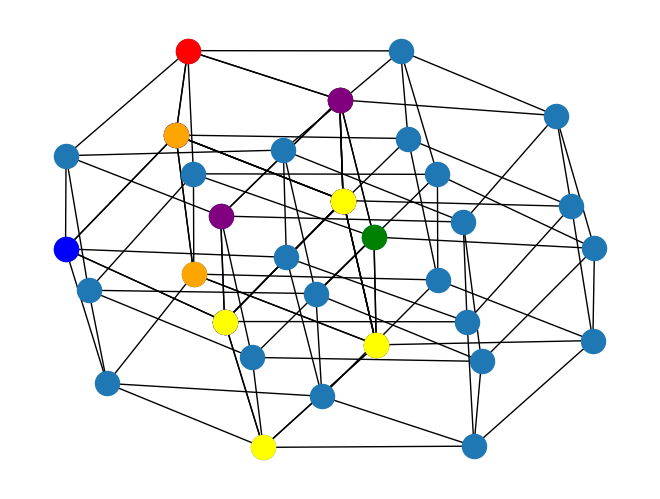

In [5]:
m = 5
K = set(range(1, m))
q = 1
r = 2

G = nx.hypercube_graph(m)
logical_operators = list(enumerate_logical_qubits(K, q, r))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=False)

colors = ["red", "blue", "green", "purple", "orange", "yellow"]
color_cycle = itertools.cycle(colors)


for log_qubit in logical_operators:
    log_qubit_idxs = log_to_physical(log_qubit, m=m)

    nx.draw(G.subgraph(log_qubit_idxs), node_color= next(color_cycle), pos=pos, with_labels=False)



distance = 4
k = 2 (T gates)
q + 1 = 2 because d = 2^min(q + 1, m - r)
r = 3
m >= 1 + 3 * 2 + 1


d = 2
k = 3
q = 1
r = 2
m >= q + r * k + 1
m >= 1 + 6 + 1


In [6]:
only13 = list(logical_circuit_enumeration(3, set(range(1, 9)), 1, 2))

for log_qubit in only13:
    if (1, 3) in log_qubit:
        print(log_qubit)

((4, 6), (5, 7), (1, 3), (2, 8))
((4, 6), (2, 5), (1, 3), (7, 8))
((1, 3), (2, 8), (5, 6), (4, 7))
((1, 3), (6, 8), (4, 5), (2, 7))
((2, 5), (1, 3), (4, 8), (6, 7))
((1, 3), (5, 6), (4, 8), (2, 7))
((1, 3), (2, 4), (6, 7), (5, 8))
((1, 3), (4, 5), (2, 6), (7, 8))
((1, 3), (5, 6), (2, 4), (7, 8))
((5, 7), (1, 3), (6, 8), (2, 4))
((4, 6), (1, 3), (2, 7), (5, 8))
((1, 3), (2, 8), (4, 5), (6, 7))
((1, 3), (4, 7), (5, 8), (2, 6))
((2, 5), (1, 3), (6, 8), (4, 7))
((5, 7), (1, 3), (4, 8), (2, 6))


In [8]:
circ_output = logical_circuit_enumeration(3, range(1, 4 + 1), 0, 1)
print(len(circ_output))
print(circ_output)

1
{((1,), (2,), (3,), (4,))}


In [9]:
len(enumerate_logical_qubits(range(1, 7 + 1), 0, 2))

28

In [29]:
indexed_logical_qubits(3, 0, 2)

{(1, 3): 1, (1, 2): 2, (2,): 3, (2, 3): 4, (1,): 5, (3,): 6}

In [34]:
(1, 2) > (2, 1)

False

In [38]:
def indexed_logical_qubits(m: int, q: int, r: int, sort=True):
    assert r >= q, "Does not form a valid CSS code"
    all_logicals = enumerate_logical_qubits(set(range(1, m + 1)), q, r)
    
    if sort:
        all_logicals = sorted(all_logicals, key=lambda x: (len(x), x))
    
    logical_dict = dict(zip(all_logicals, range(1, len(all_logicals) + 1)))
    
    return logical_dict


In [11]:
# restricted_logs = enumerate_logical_qubits({1, 2, 3}, 1, 2)
all_logs = indexed_logical_qubits(5, 1, 2)
affected = logical_circuit_enumeration(1, {1, 2, 3, 5}, 1, 2)

for targets in affected:
    print([all_logs[log] for log in targets])

# for log in restricted_logs:
    # print(all_logs[log])

[8, 9]
[4, 6]
[2, 10]


In [12]:
def nck(n, k):
    return fact(n) // (fact(k) * fact(n - k))
    

def fact(n):
    out = 1
    for i in range(n):
        out *= n - i 
    
    return out

In [13]:

total_codes = 0
for m in range(10 + 1):
    total_codes += nck(m, 2)
    print(f"{m}: {total_codes}")

0: 0
1: 0
2: 1
3: 4
4: 10
5: 20
6: 35
7: 56
8: 84
9: 120
10: 165


In [14]:
indexed_logical_qubits(5, 1, 2 )

{(2, 4): 1,
 (1, 2): 2,
 (3, 4): 3,
 (1, 5): 4,
 (1, 4): 5,
 (2, 3): 6,
 (4, 5): 7,
 (2, 5): 8,
 (1, 3): 9,
 (3, 5): 10}

Evaluating a Quantum Reed-Muller code:
1. Set code parameters:
   1. Set m, q, r, restricting q < r
2. Set logical operator parameters
   1. Specify some hypercube $K$ and physical operators of level $k$ to apply
3. Enumerate logical qubit indexing
   1. For convenience, list all logical qubits and give them an index
4. Enumerate logical circuits as hypercubes
5. Connect logical circuits and hypercubes

In [15]:
def evaluate_logical_code(m, q, r, K, k):
    assert m > 0 
    assert q < r
    # K need to be a set, k is an int
    
    map_logqubit_int = indexed_logical_qubits(m, q, r)
    logical_circuit = logical_circuit_enumeration(k, K, q, r)
    
    # map these logical circuits now to indexed form
    
    out = []
    for targs in logical_circuit:
        mapped_targs = [map_logqubit_int[qid] for qid in targs]
        out.append(mapped_targs.copy())
    
    return out
    

In [39]:
m = 6
q = 0
r = 2
k = 2

circ5 = evaluate_logical_code(m, q, r, range(1, 5 + 1), k)
circ6 = evaluate_logical_code(m, q, r, range(1, 6 + 1), k)

num_qubits = len(indexed_logical_qubits(m, q, r))

In [69]:
circ5_mat = np.zeros((len(circ5), num_qubits))
circ6_mat = np.zeros((len(circ6), num_qubits))

for rowidx, row in enumerate(circ5):
    for idx in row:
        circ5_mat[rowidx, idx - 1] = 1

for rowidx, row in enumerate(circ6):
    for idx in row:
        circ6_mat[rowidx, idx - 1] = 1


In [41]:
circ6

[[20, 7, 17],
 [18, 13, 10],
 [20, 14, 8],
 [16, 10, 15],
 [16, 11, 14],
 [19, 18, 7],
 [21, 9, 12],
 [11, 19, 12],
 [8, 19, 15],
 [8, 21, 13],
 [17, 9, 15],
 [20, 10, 12],
 [16, 21, 7],
 [11, 13, 17],
 [14, 18, 9]]

In [75]:
ll_c5 = circ5_mat.tolist()
ll_c5.sort(key=lambda x: tuple(x))

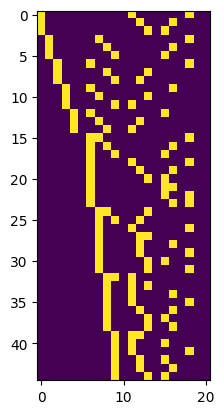

In [77]:
plt.imshow(ll_c5[::-1])

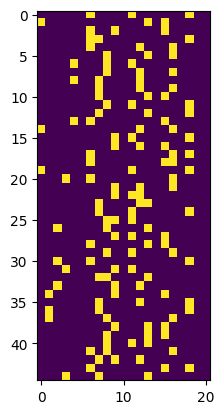

In [74]:
plt.imshow(circ5_mat)

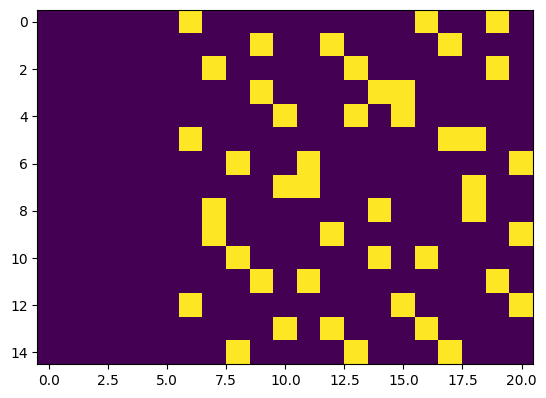

In [45]:
plt.imshow(circ6_mat)

In [46]:
def mat_to_ir(mat):
    # input: len(circuit) x num qubits
    # output: len(circuit) x num qubits
    # we want an IR that allows us to go to Qcirc easily
    # out_{ij} = 0 --> just use \qw
    # out_{ij} = k --> \ctrl{k}
    # out_{ij} = -1 --> \ctrl{0}
    
    out = np.zeros_like(mat)
    for r_idx, row in enumerate(mat):
        # get all the nonzero idxs
        nonzero_idxs = np.nonzero(row)[0]
        
        assert len(nonzero_idxs) > 1, "No CZs"
        
        for c_idx, val in enumerate(nonzero_idxs[:-1]):
            out[r_idx, val] = nonzero_idxs[c_idx + 1] - val
        
        out[r_idx, nonzero_idxs[-1]] = -1
    
    return out

In [58]:
list({1: 2}.items())

[(1, 2)]

In [91]:
def to_qcirc(mat, qb_labels=None):
    qb_x_time = mat.T
    
    all_qbs = list(qb_labels.items())
    
    print(r"\begin{adjustbox}{width=0.8 \paperheight} \begin{quantikz}")
    # [font=\tiny]
    
    for (qb_idx, qb) in enumerate(qb_x_time):
        # add qubit annotation
        if qb_labels:
            print("\\lstick{$\\overline{%s}$} = %s &" %(qb_idx + 1, all_qbs[qb_idx][0]), end="")
        
        for (time_idx, time) in enumerate(qb):
            if time == 0:
                print(f"\\qw &", end="")
            elif time == -1:
                print(f"\\ctrl{{{0}}} &", end="")
            else:
                print(f"\\ctrl{{{int(time)}}} &", end="")
        print("\\\\")
    
    print(r"\end{quantikz} \end{adjustbox}")


In [92]:
to_qcirc(mat_to_ir(ll_c5[::-1]), qb_labels=indexed_logical_qubits(m, q, r))

\begin{adjustbox}{width=0.8 \paperheight} \begin{quantikz}[font=\tiny]
\lstick{$\overline{1}$} = (1,) &\ctrl{11} &\ctrl{12} &\ctrl{13} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\\
\lstick{$\overline{2}$} = (2,) &\qw &\qw &\qw &\ctrl{6} &\ctrl{7} &\ctrl{8} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\\
\lstick{$\overline{3}$} = (3,) &\qw &\qw &\qw &\qw &\qw &\qw &\ctrl{4} &\ctrl{6} &\ctrl{7} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\\
\lstick{$\overline{4}$} = (4,) &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\ctrl{3} &\ctrl{4} &\ctr

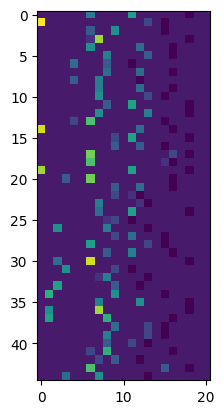

In [48]:
plt.imshow(mat_to_ir(circ5_mat))

In [49]:
np.nonzero([1, 2, 3, 0 ])[0]

array([0, 1, 2], dtype=int64)

In [88]:
def make_code(k, K, m, q, r,):
    circ = evaluate_logical_code(m, q, r, K, k)
    qubits = indexed_logical_qubits(m, q, r)
    num_qubits = len(qubits)
    
    circ_mat = np.zeros((len(circ), num_qubits))
    for rowidx, row in enumerate(circ):
        for idx in row:
            circ_mat[rowidx, idx - 1] = 1
    
    # sort
    sorted_circ_mat = circ_mat.tolist()
    sorted_circ_mat.sort(key=lambda x: tuple(x))
    sorted_circ_mat = sorted_circ_mat[::-1]
    
    qcirc_mat = mat_to_ir(sorted_circ_mat)
    
    to_qcirc(qcirc_mat, qb_labels=qubits)
    

In [90]:
make_code(2, range(1, 5 + 1), 5, 0, 2)

\lstick{$\overline{1}$} = (1,) &\ctrl{9} &\ctrl{10} &\ctrl{11} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\\
\lstick{$\overline{2}$} = (2,) &\qw &\qw &\qw &\ctrl{5} &\ctrl{6} &\ctrl{7} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\\
\lstick{$\overline{3}$} = (3,) &\qw &\qw &\qw &\qw &\qw &\qw &\ctrl{3} &\ctrl{5} &\ctrl{6} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\\
\lstick{$\overline{4}$} = (4,) &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\ctrl{2} &\ctrl{3} &\ctrl{5} &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\qw &\